<a href="https://colab.research.google.com/github/hbisgin/datamining/blob/main/SupportVectorMachinesW25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from sklearn import svm
import pandas as pd
import numpy as np

C=1e+03
gamma=1e-05
clf = svm.SVC(C=C, gamma=gamma, kernel='rbf', probability=True)

In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/My Drive/TEACHING/CSC_487_587/data/diabetes_train.csv') #this is our dataset, please change the path for your case
test = pd.read_csv('/content/drive/My Drive/TEACHING/CSC_487_587/data/diabetes_test.csv')
train.columns[:8] #wanted to show which attributs we have

In [ ]:
clf = clf.fit(train.iloc[:,0:8], train.iloc[:,8]) #first paramater data, second labels
y_pred = clf.predict(test.iloc[:,0:8]) #doing prediction on unknown test set
y_pred

In [ ]:
from sklearn.metrics import confusion_matrix #let's see how good we did
y_true = test.iloc[:,8]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

(6, 1, 1, 2)

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from scipy import interp

y = test.iloc[:,8]
scores = clf.predict_proba(test.iloc[:,0:8])
scores[:,1]
#y is the true labels, scores[:,1] which has probabilities
fpr, tpr, thresholds = roc_curve(y, scores[:,1], pos_label='tested_positive')
#fpr, tpr, thresholds = roc_curve(true_labels, scores[:,1], pos_label=1)

roc_auc = auc(fpr,tpr)

print(fpr)

print(tpr)

print(thresholds)

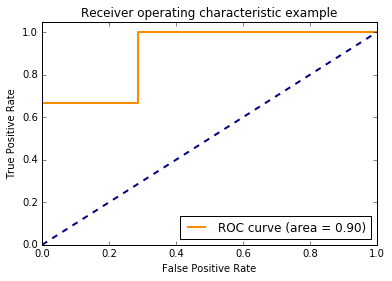

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()